In [2]:
#dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy import stats

from scipy.stats import linregress
from sklearn import datasets


In [3]:
#Install Fred API library
!pip install fredapi

In [4]:
# Import Fred API
from fredapi.version import version as __version__
from fredapi.fred import Fred

In [5]:
# Import the Fred and BLS API key
from api_keys import fred_api_key

In [6]:
# class that will interact with the FRED API

class FredPy:

    def __init__(self, token=None):
        self.token = token
        self.url = "https://api.stlouisfed.org/fred/series/observations" + \
            "?series_id={seriesID}&api_key={key}&file_type=json" + \
            "&observation_start={start}&observation_end={end}&units={units}"

    def set_token(self, token):
        self.token = token

    def get_series(self, seriesID, start, end, units):

        # The URL string with the values inserted into it
        url_formatted = self.url.format(
            seriesID=seriesID, start=start, end=end, units=units, key=self.token
        )

        response = requests.get(url_formatted)

        # If the response was successful, extract the data from it
        if(response.status_code == 200):
            data = pd.DataFrame(response.json()['observations'])[['date', 'value']]\
                    .assign(date = lambda cols: pd.to_datetime(cols['date']))\
                    .assign(value = lambda cols: cols['value'].astype(float))\
                    .rename(columns = {'value': seriesID})
            
            return data
        
        else:
            raise Exception("Error from API, status code' = {}".format(response.status_code))

In [7]:
# Instantiate fredpy object
fredpy = FredPy()

# Set the API key
fredpy.set_token(fred_api_key)

In [8]:
# Get the CPI Rate series and DataFrame to develop scatter plot and regression line for last 24 months of data, from Fred API
CPIRATE_df = fredpy.get_series(
    seriesID = 'CPIAUCSL',
    start = '2021-02-01',
    end = '2023-02-01',
    units = 'pc1'
)
CPIRATE_df.name = 'CPI'
CPIRATE_df

,date,CPIAUCSL
0,2021-02-01,1.69336
1,2021-03-01,2.63052
2,2021-04-01,4.13055
3,2021-05-01,4.91503
4,2021-06-01,5.28161
5,2021-07-01,5.22151
6,2021-08-01,5.18829
7,2021-09-01,5.38363
8,2021-10-01,6.23775
9,2021-11-01,6.86239


In [9]:
#Pass index as new column

CPIRATE_df['index'] = CPIRATE_df.index
CPIRATE_df


,date,CPIAUCSL,index
0,2021-02-01,1.69336,0
1,2021-03-01,2.63052,1
2,2021-04-01,4.13055,2
3,2021-05-01,4.91503,3
4,2021-06-01,5.28161,4
5,2021-07-01,5.22151,5
6,2021-08-01,5.18829,6
7,2021-09-01,5.38363,7
8,2021-10-01,6.23775,8
9,2021-11-01,6.86239,9


In [10]:
# Get the Fed Fund Rate series and DataFrame to develop scatter plot and regression line for last 24 months of data, from Fred API
FF_df = fredpy.get_series(
    seriesID = 'FEDFUNDS',
    start = '2021-02-01',
    end = '2023-02-01',
    units = 'lin'
)
FF_df

,date,FEDFUNDS
0,2021-02-01,0.08
1,2021-03-01,0.07
2,2021-04-01,0.07
3,2021-05-01,0.06
4,2021-06-01,0.08
5,2021-07-01,0.10
6,2021-08-01,0.09
7,2021-09-01,0.08
8,2021-10-01,0.08
9,2021-11-01,0.08


In [11]:
#Pass index as new column

FF_df['index'] = FF_df.index
FF_df

,date,FEDFUNDS,index
0,2021-02-01,0.08,0
1,2021-03-01,0.07,1
2,2021-04-01,0.07,2
3,2021-05-01,0.06,3
4,2021-06-01,0.08,4
5,2021-07-01,0.10,5
6,2021-08-01,0.09,6
7,2021-09-01,0.08,7
8,2021-10-01,0.08,8
9,2021-11-01,0.08,9


The r-squared is: 0.47138826484675356
The r-squared is: 0.47138826484675356


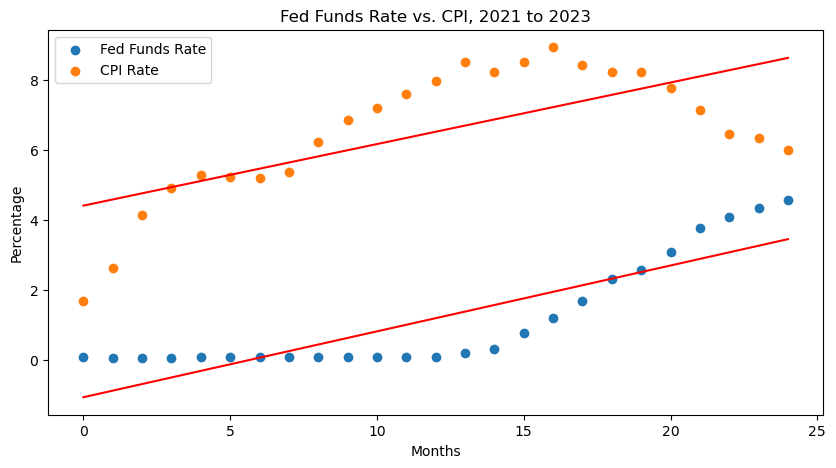

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(FF_df['index'], FF_df['FEDFUNDS'])
regress_values_FF = FF_df['index'] * slope + intercept
line_eq_FF = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

(slope, intercept, rvalue, pvalue, stderr) = linregress(CPIRATE_df['index'], CPIRATE_df['CPIAUCSL'])
regress_values_CPI = CPIRATE_df['index'] * slope + intercept
line_eq_CPI = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (10,5))
plt.scatter(FF_df['index'], FF_df['FEDFUNDS'], label="Fed Funds Rate")
plt.scatter(CPIRATE_df['index'], CPIRATE_df['CPIAUCSL'], label="CPI Rate")

plt.plot(FF_df['index'],regress_values_FF,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.plot(CPIRATE_df['index'],regress_values_CPI,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Fed Funds Rate vs. CPI, 2021 to 2023")
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.legend(loc='best')
plt.show()
